## Bar products Classification using Transfer Learning | Deep Learning Project

> Extracting Dataset using Kaggle API/ <br/>
>  **Collecting**& **Creating Data** from: Google,Roboflow,Hugging Face,'Take pictures of products'.

In [3]:
# installing the Kaggle library
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

>Importing the Dog vs Cat Dataset from Kaggle </br>
[Link Kaggle](https://www.kaggle.com/datasets/filhypedeeplearning/coffee-images 'Kaggle-Coffe Dataset')

In [5]:
!kaggle datasets download -d filhypedeeplearning/coffee-images

401 - Unauthorized


### Etracting the compressed dataset

In [6]:
from zipfile import ZipFile
dataset = 'coffee-images.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


### Take pictures of products 
> Here is the Dataset that i made by myself </br>
    > [My data in Google Drive](https://drive.google.com/drive/folders/1VxCEz-91TYZS2z1Ksya4lXh2-PGjPnYT "The Data")

### Importing the Dependencies
```
    import os
    import numpy as np
    import pandas as pd
    import cv2 
    import glob
    from PIL import Image
    import matplotlib.pyplot as plt 
    import matplotlib.image as mpimg
    from sklearn.model_selection import train_test_split

```

In [2]:
import os
import numpy as np
import pandas as pd
import cv2 
import glob
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


### Counting the number of images on the Dataset

In [3]:
import os 

path, dirs, files = next(os.walk('AllData/Corona/'))
file_counts = len(files)
print(f'Number of images on this dataset is : {file_counts}')

Number of images on this dataset is : 137


In [4]:
# Printing all file names in the direcotry
file_names = os.listdir('Train_Data1/')
print(file_names)

['RedBull_rotated_202.jpg', 'coca_cola_rotated_132.jpg', 'macchiato_235.jpg', 'macchiato_366.jpg', 'RedBull_rotated_37.jpg', 'EspressoCoffe_145.jpg', 'coca_cola_rotated_2.jpg', 'sprite_rotated_314.jpg', 'Corona_rotated_221.jpg', 'EspressoCoffe_202.jpg', 'sprite_rotated_121.jpg', 'EspressoCoffe_127.jpg', 'Corona_rotated_353.jpg', 'Corona_rotated_285.jpg', 'macchiato_121.jpg', 'EspressoCoffe_131.jpg', 'macchiato_98.jpg', 'sprite_rotated_98.jpg', 'RedBull_rotated_161.jpg', 'coca_cola_rotated_338.jpg', 'sprite_rotated_235.jpg', 'EspressoCoffe_14.jpg', 'Corona_rotated_219.jpg', 'sprite_rotated_353.jpg', 'coca_cola_rotated_353.jpg', 'sprite_rotated_35.jpg', 'Corona_rotated_200.jpg', 'coca_cola_rotated_60.jpg', 'EspressoCoffe_47.jpg', 'RedBull_rotated_145.jpg', 'Corona_rotated_194.jpg', 'RedBull_rotated_111.jpg', 'sprite_rotated_288.jpg', 'sprite_rotated_305.jpg', 'coca_cola_rotated_246.jpg', 'EspressoCoffe_147.jpg', 'Corona_rotated_175.jpg', 'Corona_rotated_248.jpg', 'RedBull_rotated_144.jpg

#### After we build the dataset we can see that aren't many data to put in the model </br>
* Here is a function that rotate the image by 180 degrees, 120 degrees, 90 degrees

In [ ]:
import os
import cv2
import numpy as np

# Define the input and output directories
input_dir = "/path/to/directory"
output_dir = "/path/to/directory"

# Define a function to rotate an image by a given angle and save the resulting image to a new directory
def rotate_image(image_path, output_dir, angle):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Rotate the image by the given angle
    rotated = cv2.rotate(image, angle)
    # Save the rotated image to the output directory
    filename = os.path.basename(image_path)
    cv2.imwrite(os.path.join(output_dir, f'rotated_{angle}_{filename}'), rotated)

# Loop over all the images in the input directory and rotate them by 180, 90, and 120 degrees
for filename in os.listdir(input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_dir, filename)
        # Rotate the image by 180 degrees and save it to the output directory
        rotate_image(image_path, output_dir, cv2.ROTATE_180)
        # Rotate the image by 90 degrees and save it to the output directory
        rotate_image(image_path, output_dir, cv2.ROTATE_90_CLOCKWISE)
        # Rotate the image by 120 degrees and save it to the output directory
        rotate_image(image_path, output_dir, cv2.ROTATE_90_COUNTERCLOCKWISE)

When building a model for computer vision tasks, such as image classification or object detection, it's important to ensure that all the images are in the same format for several reasons:

Consistency: Keeping all the images in the same format ensures that they have a consistent size, resolution, and color space. This is important because the model expects all the images to be of the same format, and any variation in the format can lead to inconsistencies in the output.

Efficiency: Processing images in different formats requires additional time and computational resources. By keeping the images in the same format, we can optimize the processing pipeline to ensure maximum efficiency.

Standardization: Having a standardized format makes it easier to compare and share the dataset with other researchers, as they will know exactly what format the images are in and how they were preprocessed.

In [ ]:
import os

# Set the directory path containing the JPEG images
directory = "/path/to/directory"

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpeg')or filename.endswith(".jpeg") or filename.endswith(".png") or filename.endswith(".webp"):
        # Construct the old and new filenames
        old_filepath = os.path.join(directory, filename)
        new_filepath = os.path.join(directory, filename[:-5] + '.jpg')
        
        # Rename the file
        os.rename(old_filepath, new_filepath)

#### After we collected the data the images propably would have diferent names
> let's write a function that __rename__ the images in a directory

In [ ]:
# dir = '/home/xhulio/First_Project/espresso_macchiato_rotated/'
dir = "/path/to/directory"

files = os.listdir(dir)
New_name = input('Enter New name:')

counter = 1
for file in files:
    filename = os.path.join(dir, file)
    file_ext = os.path.splitext(filename)[1]
    new_name = os.path.join(dir, f'{New_name}_{counter}{file_ext}')
#     print('Completed')
    os.rename(filename, new_name)
    counter += 1

### Displaying the images

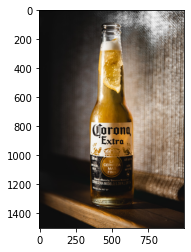

In [5]:
img = mpimg.imread('/home/xhulio/First_Project/AllData/Corona/Corona_29.jpg')
img = plt.imshow(img)
plt.show()

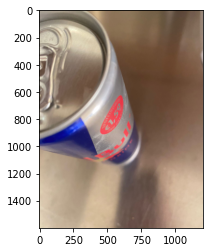

In [6]:
img = mpimg.imread('/home/xhulio/First_Project/AllData/RedBull/RedBull_110.jpg')
img = plt.imshow(img)
plt.show()

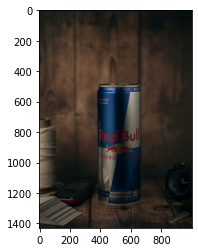

In [7]:
img = mpimg.imread('/home/xhulio/First_Project/AllData/RedBull/RedBull_80.jpg')
img = plt.imshow(img)
plt.show()

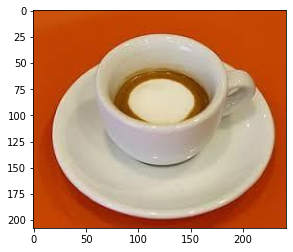

In [8]:
img = mpimg.imread('/home/xhulio/First_Project/AllData/espresso_macchiato/espresso macchiato_123.jpg')
img = plt.imshow(img)
plt.show()

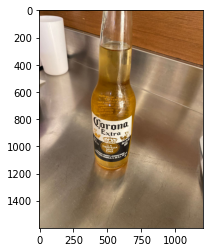

In [9]:
img = mpimg.imread('/home/xhulio/First_Project/AllData/Corona/Corona_10.jpg')
img = plt.imshow(img)

`Resize the images for a better performance `

In [ ]:
# input_folder = "/home/xhulio/First_Project/Train_Data/"
input_folder =  "/path/to/directory"
# output_folder = "/home/xhulio/First_Project/Train_Data1/"
output_folder ="/path/to/directory"
target_size = (224, 224) # Specify your target size here

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    output_path = os.path.join(output_folder, filename)
    with Image.open(input_path) as img:
        img = img.resize(target_size)
        img.save(output_path)

`Counting the images for a direcotory and let's see how many training data we have`

In [11]:
file_name = os.listdir('Train_Data1/')
espresso = 0
macchiato = 0
cocacola = 0
corona = 0
RedBull = 0
sprite = 0

for img_file in file_name:
    
    name = img_file[0:4]
    
    if name == 'Espr':
        espresso += 1
    elif name == 'macc':
        macchiato += 1
    elif name == 'coca':
        cocacola += 1
    elif name == 'Coro':
        corona += 1
    elif name == 'RedB':
        RedBull += 1
    elif name == 'spri':
        sprite += 1
print(f'The number of espresso images = {espresso}')
# print(f'The number of longblack images = {longblack}')
print(f'The number of macchiato images = {macchiato}')
print(f'The number of cocacola images = {cocacola}')
print(f'The number of corona images = {corona}')
print(f'The number of RedBull images = {RedBull}')
print(f'The number of sprite images = {sprite}')
print(f'The sum of all iamges is : {espresso + macchiato + cocacola + corona + RedBull + sprite }')

The number of espresso images = 396
The number of macchiato images = 379
The number of cocacola images = 354
The number of corona images = 412
The number of RedBull images = 372
The number of sprite images = 372
The sum of all iamges is : 2285


#### Displaying the resized images

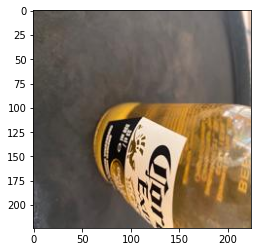

In [12]:
img = mpimg.imread('/home/xhulio/First_Project/Train_Data1/Corona_rotated_10.jpg')
img = plt.imshow(img)
plt.show()

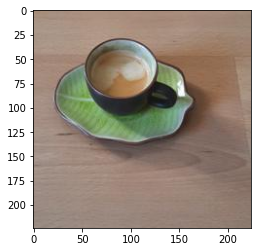

In [13]:
img = mpimg.imread('/home/xhulio/First_Project/Train_1/espresso_101.jpg')
img = plt.imshow(img)

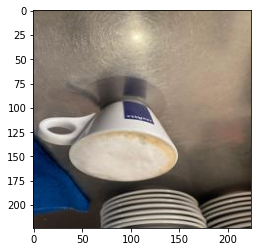

In [14]:
img = mpimg.imread('/home/xhulio/First_Project/Train_Data1/macchiato_1.jpg')
img = plt.imshow(img)
plt.show()

### Creating a for loop to assign labels

In [14]:
file_names = 'Train_Data1/'

labels = []

for i in os.listdir(file_names):
    file_name = i[0:4]
    label = file_name[0:4]
    if label == 'Espr':
        labels.append(0)
    elif label == 'macc':
        labels.append(1)
    elif label == 'coca':
        labels.append(2)
    elif label == 'RedB':
        labels.append(3)
    elif label == 'spri':
        labels.append(4)
    elif label == 'Coro':
        labels.append(5)
#  Printing the labels 
print(labels)
len(labels)

[3, 2, 1, 1, 3, 0, 2, 4, 5, 0, 4, 0, 5, 5, 1, 0, 1, 4, 3, 2, 4, 0, 5, 4, 2, 4, 5, 2, 0, 3, 5, 3, 4, 4, 2, 0, 5, 5, 3, 5, 2, 1, 3, 2, 3, 1, 4, 4, 0, 4, 5, 2, 4, 2, 4, 4, 0, 3, 3, 3, 2, 4, 0, 4, 5, 4, 1, 4, 1, 0, 3, 4, 2, 2, 4, 0, 0, 2, 3, 3, 3, 2, 0, 0, 4, 2, 3, 2, 0, 4, 3, 3, 4, 5, 5, 1, 1, 5, 3, 5, 1, 0, 5, 3, 5, 5, 2, 0, 4, 2, 1, 5, 3, 3, 5, 0, 1, 3, 1, 2, 2, 0, 5, 0, 1, 5, 4, 3, 4, 2, 3, 5, 0, 4, 4, 3, 0, 3, 1, 5, 0, 4, 5, 0, 4, 5, 2, 5, 4, 1, 4, 4, 2, 3, 1, 4, 1, 4, 2, 5, 1, 3, 1, 2, 0, 2, 3, 1, 3, 2, 3, 2, 3, 4, 1, 1, 0, 2, 5, 3, 4, 5, 1, 5, 3, 0, 1, 2, 2, 0, 5, 4, 4, 4, 0, 3, 5, 2, 4, 1, 4, 2, 5, 4, 2, 0, 2, 0, 0, 3, 0, 1, 1, 1, 4, 3, 3, 4, 1, 1, 3, 0, 0, 5, 4, 4, 5, 4, 3, 1, 4, 4, 5, 0, 2, 1, 5, 4, 0, 1, 1, 3, 1, 4, 2, 3, 3, 4, 2, 3, 3, 5, 0, 1, 3, 1, 5, 5, 0, 2, 0, 3, 0, 4, 1, 0, 5, 1, 3, 0, 5, 0, 4, 1, 3, 2, 0, 1, 1, 4, 4, 1, 3, 3, 0, 2, 5, 4, 5, 0, 5, 3, 5, 4, 1, 0, 2, 5, 5, 5, 0, 4, 0, 1, 3, 3, 0, 3, 1, 0, 4, 3, 0, 5, 0, 3, 1, 1, 3, 1, 2, 4, 0, 3, 5, 5, 0, 0, 4, 2, 3, 1, 1, 

2285

In [17]:
# counting the images of products

values , counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5]
[396 379 354 372 372 412]


`Converting all the resized images to numpy arrays`

In [20]:
image_directory = 'Train_Data1/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

bar_products = np.asarray([cv2.imread(file) for file in files])
print(bar_products)
type(bar_products)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[ 73  85  95]
   [ 72  84  94]
   [ 72  84  94]
   ...
   [140 167 181]
   [142 170 181]
   [143 171 182]]

  [[ 71  83  93]
   [ 71  83  93]
   [ 71  83  93]
   ...
   [135 162 176]
   [138 165 179]
   [139 166 180]]

  [[ 70  82  92]
   [ 70  82  92]
   [ 69  81  91]
   ...
   [131 157 173]
   [135 161 177]
   [137 163

numpy.ndarray

In [21]:
bar_products.shape

(2285, 224, 224, 3)

In [22]:
X = bar_products

Y = np.asarray(labels)

In [24]:
print(X)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[ 73  85  95]
   [ 72  84  94]
   [ 72  84  94]
   ...
   [140 167 181]
   [142 170 181]
   [143 171 182]]

  [[ 71  83  93]
   [ 71  83  93]
   [ 71  83  93]
   ...
   [135 162 176]
   [138 165 179]
   [139 166 180]]

  [[ 70  82  92]
   [ 70  82  92]
   [ 69  81  91]
   ...
   [131 157 173]
   [135 161 177]
   [137 163

In [25]:
print(Y)

[3 2 1 ... 4 1 2]


### Train Test Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(2285, 224, 224, 3) (1828, 224, 224, 3) (457, 224, 224, 3)


> 1828 ---> Training images </br>
> 457  ---> Test images

`Scaling the data`

In [28]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [29]:
print(X_train_scaled)
#  the sacling part its used for activation function because sigmoid and Relu are 0-->1
#  and the work better around 0 and 1

[[[[0.24313725 0.28627451 0.30196078]
   [0.24313725 0.28627451 0.30196078]
   [0.24313725 0.28627451 0.30196078]
   ...
   [0.22352941 0.28235294 0.31764706]
   [0.22745098 0.28627451 0.32156863]
   [0.22745098 0.28627451 0.32156863]]

  [[0.24313725 0.28627451 0.30196078]
   [0.24705882 0.29019608 0.30588235]
   [0.25098039 0.29411765 0.30980392]
   ...
   [0.20784314 0.26666667 0.30196078]
   [0.21176471 0.27058824 0.30588235]
   [0.21568627 0.2745098  0.30980392]]

  [[0.24313725 0.28627451 0.30196078]
   [0.24705882 0.29019608 0.30588235]
   [0.25490196 0.29803922 0.31372549]
   ...
   [0.20784314 0.26666667 0.30196078]
   [0.20784314 0.26666667 0.30196078]
   [0.21176471 0.27058824 0.30588235]]

  ...

  [[0.34509804 0.34117647 0.38039216]
   [0.3372549  0.34117647 0.38039216]
   [0.3372549  0.34117647 0.38039216]
   ...
   [0.58431373 0.65882353 0.69019608]
   [0.69019608 0.76078431 0.80392157]
   [0.71764706 0.79215686 0.82352941]]

  [[0.35686275 0.34117647 0.38431373]
   [0.3

### Building the Neural Network

`Importing the Dependencies`

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

2023-04-18 16:27:13.465963: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 16:27:13.937504: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-18 16:27:14.032897: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/xhulio/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-04-18 16:27:14.032913: I t

In [31]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

2023-04-18 16:27:21.531422: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/xhulio/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-04-18 16:27:21.531622: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-18 16:27:21.531638: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (xhulio-IdeaPad-3-17ITL6): /proc/driver/nvidia/version does not exist
2023-04-18 16:27:21.531801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler fla

In [32]:
number_of_classes = 6

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(number_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics= ['acc']
)

In [34]:
history = model.fit(X_train_scaled,Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
52/52 [==============================] - 17s 303ms/step - loss: 0.8466 - acc: 0.7003 - val_loss: 0.4286 - val_acc: 0.8579
Epoch 2/10
52/52 [==============================] - 16s 304ms/step - loss: 0.2614 - acc: 0.9435 - val_loss: 0.2482 - val_acc: 0.9344
Epoch 3/10
52/52 [==============================] - 15s 292ms/step - loss: 0.1587 - acc: 0.9757 - val_loss: 0.1797 - val_acc: 0.9454
Epoch 4/10
52/52 [==============================] - 16s 301ms/step - loss: 0.1114 - acc: 0.9836 - val_loss: 0.1898 - val_acc: 0.9454
Epoch 5/10
52/52 [==============================] - 14s 274ms/step - loss: 0.0882 - acc: 0.9891 - val_loss: 0.1295 - val_acc: 0.9672
Epoch 6/10
52/52 [==============================] - 14s 274ms/step - loss: 0.0668 - acc: 0.9927 - val_loss: 0.1130 - val_acc: 0.9781
Epoch 7/10
52/52 [==============================] - 14s 274ms/step - loss: 0.0538 - acc: 0.9970 - val_loss: 0.1069 - val_acc: 0.9672
Epoch 8/10
52/52 [==============================] - 14s 278ms/step - 

In [35]:
score, acc = model.evaluate(X_test_scaled,Y_test)
print(f'Test Loss= {score}')
print(f'Test Accuracy= {acc}')

15/15 [==============================] - 4s 236ms/step - loss: 0.0949 - acc: 0.9716
Test Loss= 0.09490843117237091
Test Accuracy= 0.9715536236763


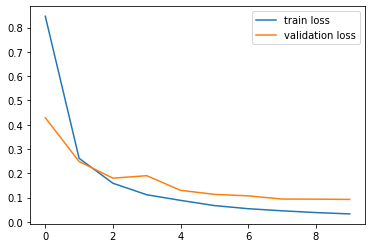

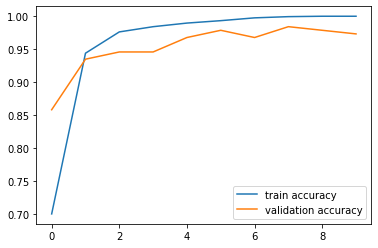

In [36]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of image to be predicted')
input_image = cv2.imread(input_image_path)

# cv2.imshow('type', input_image)
# cv2.waitKey()

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_prediction)
if input_pred_label == 0:
    print('This image represent Coffe espresso')
elif input_pred_label == 1:
    print('The image represent Coffe macchiato')
elif input_pred_label == 2:
    print('The image represent Coca-Cola')
elif input_pred_label == 3:
    print('The image represent RedBull')
elif input_pred_label == 4:
    print('The image represent Sprite')
elif input_pred_label == 5:
    print('The image represent Corona ')
